**USPS dataset**

---

[Handwitten Digits USPS dataset](http://ieeexplore.ieee.org/document/291440/) has 7291 train and 2007 test images. The images are 16*16 grayscale pixels.
The dataset is given in [hdf5 file format](https://support.hdfgroup.org/HDF5/), the hdf5 file has two groups train and test and each group has two datasets: data and target.

---

References and Citations:

---

[Kaggle Dataset](https://www.kaggle.com/bistaumanga/usps-dataset)  |  [Kaggle - Heart Disease Classification](https://www.kaggle.com/cdabakoglu/heart-disease-classifications-machine-learning)  |  [Github - Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow  03.Classification.ipynb](https://nbviewer.jupyter.org/github/Akramz/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/master/03.Classification.ipynb)

---

Textbook - Introduction to Machine Learning with Python ,A Guide 
for Data Scientists by Andreas C. Müller and Sarah Guido

---

Demonstration of how to load USPS dataset, visualize and build a K - Neighbors classifier on it that achieves over 90% accuracy over the test set.

---

Assignment 1 - Submitted by Akshay Raina (Id: 1001789877)

**Download, Extract Dataset from .zip and place with Python Notebook together**

In [380]:
import os
import h5py
import sklearn
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from functools import reduce
from google.colab import files
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix


**Upload the dataset to Google collaboratory**

In [382]:
upload = files.upload()

Saving usps.h5 to usps.h5


**Initially test if  dataset is uploaded in folder named "content" else adjust folder path accordinly everywhere**

In [383]:
print("Files present in current working directory:\n")
print(os.listdir("../content/"))
if os.path.exists(os.path.join(os.getcwd(), '../content/', 'usps.h5')) == True:
  print("\nData Successfully uploaded!")

Files present in current working directory:

['.config', 'usps.h5', '.ipynb_checkpoints', 'sample_data']

Data Successfully uploaded!


**Function to read USPS data**

In [384]:
def hdf5(path, data_key="data",target_key="target", flatten=True ):
  """
      loads data from hdf5: 
      - hdf5 should have 'train' and 'test' groups 
      - each group should have 'data' and 'target' dataset or spcify the key
      - flatten means to flatten images N * (C * H * W) as N * D array
  """
  with h5py.File(path,'r') as hf:
    print("Verify that Dataset is present at path '../content/usps.h5'. Path is",path)
    print("\nhdf5 groups are:" , list(hf.keys()))
    train = hf.get('train')
    X_train = train.get(data_key)[:]
    y_train = train.get(target_key)[:]
    test = hf.get('test')
    X_test = test.get(data_key)[:]
    y_test = test.get(target_key)[:]
    if flatten:
      X_train = X_train.reshape(X_train.shape[0], reduce(lambda a, b: a * b, X_train.shape[1:]))
      X_test = X_test.reshape(X_test.shape[0], reduce(lambda a, b: a * b, X_test.shape[1:]))
  return X_train, y_train, X_test, y_test

In [386]:
X_train, y_train, X_test, y_test = hdf5("../content/usps.h5")
print('\nTrain Group Data dataset shape:',X_train.shape)
print('Train Group Target dataset Shape:',y_train.shape)
print("Train Group Data datset sample: \n",X_train)
print("Train Group Target dataset sample: \n",y_train)
print("\n")
print('Test Group Data dataset shape:',X_test.shape)
print('Test Group Target dataset shape:',y_test.shape)
print("Test Group Data datset sample: ",X_test)
print("Test Group Target dataset sample: ",y_test)

Verify that Dataset is present at path '../content/usps.h5'. Path is ../content/usps.h5

hdf5 groups are: ['test', 'train']

Train Group Data dataset shape: (7291, 256)
Train Group Target dataset Shape: (7291,)
Train Group Data datset sample: 
 [[0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.1645 0.086  0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 ...
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.     0.     0.    ]]
Train Group Target dataset sample: 
 [6 5 4 ... 3 0 1]


Test Group Data dataset shape: (2007, 256)
Test Group Target dataset shape: (2007,)
Test Group Data datset sample:  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Test Group Target dataset sample:  [9 6 3 ... 4 0 1]


**Data Visualization**

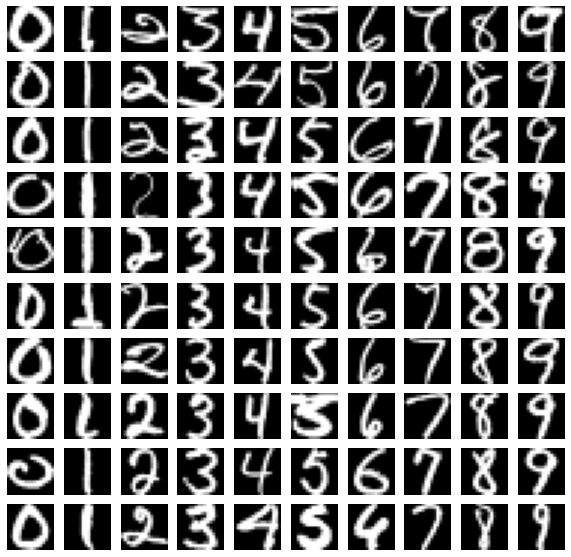

In [387]:
#Analyzing test group using Visualization
num_samples = 10
num_classes = len(set(y_test))
# or
classes = set(y_test)
num_classes = len(classes)

fig, ax = plt.subplots(num_samples, num_classes, sharex = True, sharey = True, figsize=(num_classes, num_samples))

for label in range(num_classes):
    class_idxs = np.where(y_test == label)
  
    for i, idx in enumerate(np.random.randint(0, class_idxs[0].shape[0], num_samples)):
        ax[i, label].imshow(X_test[class_idxs[0][idx]].reshape([16, 16]), 'gray')
        ax[i, label].set_axis_off()

In [388]:
X, y = X_train[:3500], y_train[:3500]
X.shape, y.shape

((3500, 256), (3500,))

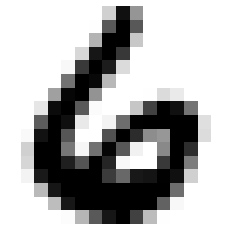

In [389]:
some_digit  = X[0]
some_digit_image  = some_digit.reshape(16,16)
plt.imshow(some_digit_image , cmap='binary')
plt.axis('off')
plt.show()

In [390]:
y[0]

6

**Choosing the best K value**

---


The **elbow method** has been used to pick a good K value by concentrating on both accuracy and error rate.

---
1. Choose a K value based on the accuracy rate


Text(0, 0.5, 'Accuracy Rate')

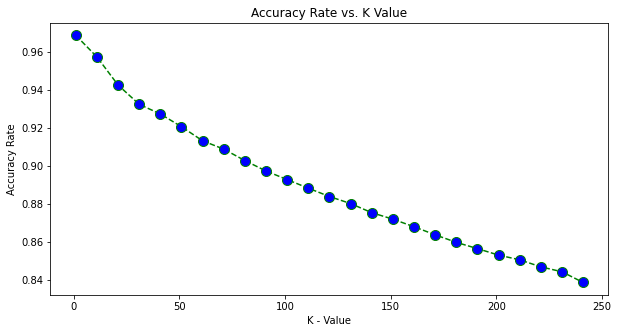

In [391]:
# store accuracy rates in array for different values of nearest-neighbours
accuracy_rate = []
K_Values = np.arange(1,250,10)
# We take 250 nearest neighbour values, classifier is used and score is calculated
# by cross-validation and acuracy rates are appended for each values of nearest neighbors
for i in K_Values:
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

plt.figure(figsize=(10,5))
plt.plot(K_Values,accuracy_rate,color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K - Value')
plt.ylabel('Accuracy Rate')

2. Choose a K value based on the error rate

Text(0, 0.5, 'Error Rate')

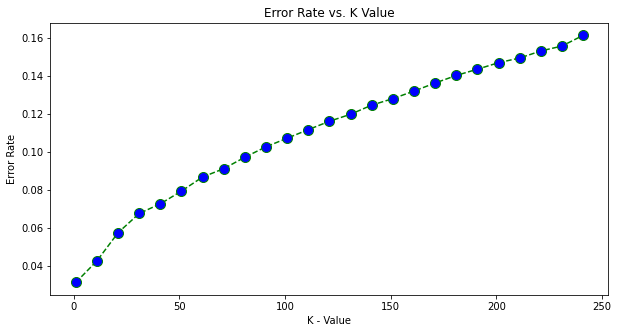

In [392]:
# store error rates in array for different values of nearest-neighbours
error_rate = []
K_Values = np.arange(1,250,10)
# We take 250 nearest neighbour values, classifier is used and score is calculated
# by cross-validation and error rates are appended for each values of nearest neighbors
for i in K_Values:
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,X_train,y_train,cv=10)
    error_rate.append(1-score.mean())

plt.figure(figsize=(10,5))
plt.plot(K_Values,error_rate,color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K - Value')
plt.ylabel('Error Rate')

**Building a K - Neighbors Classifer**

---


Demonstrating training of K - Neighbors Classifer and computing the accuracy.

In [393]:
# As we seen from above plots, accuracy of 10 nearest neighbors case is good so we select them.

model = KNeighborsClassifier(n_neighbors = 10)
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("\n# Classification Report for 10 nearest neighbors\n")
print(classification_report(y_test, predictions))


# Classification Report for 10 nearest neighbors

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       359
           1       0.96      0.98      0.97       264
           2       0.95      0.91      0.93       198
           3       0.92      0.92      0.92       166
           4       0.94      0.91      0.92       200
           5       0.93      0.89      0.91       160
           6       0.96      0.94      0.95       170
           7       0.93      0.93      0.93       147
           8       0.95      0.87      0.91       166
           9       0.90      0.95      0.92       177

    accuracy                           0.94      2007
   macro avg       0.94      0.93      0.93      2007
weighted avg       0.94      0.94      0.94      2007



[[354   0   2   0   1   0   1   0   0   1]
 [  0 258   0   0   3   0   3   0   0   0]
 [  7   2 180   2   1   0   0   2   4   0]
 [  3   0   2 153   0   6   0   1   0   1]
 [  0   4   2   0 181   0   2   2   0   9]
 [  5   0   1   5   0 143   0   0   1   5]
 [  4   0   2   0   2   1 160   0   1   0]
 [  0   3   1   0   4   1   0 137   0   1]
 [  7   3   0   6   0   2   1   1 144   2]
 [  1   0   0   0   1   1   0   5   1 168]]


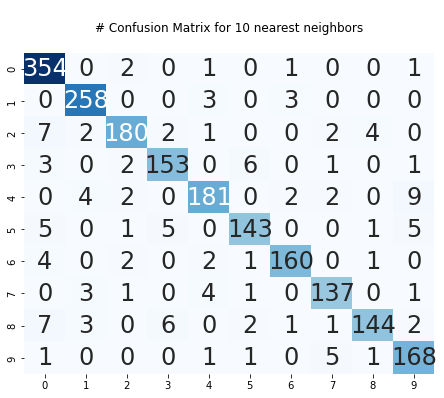

In [395]:
# Confusion Matrix for 10 nearest neighbors
print(confusion_matrix(y_test, predictions))
plt.figure(figsize=(25,13))
plt.subplot(2,3,1)
plt.title("\n# Confusion Matrix for 10 nearest neighbors\n")
sns.heatmap(confusion_matrix(y_test,predictions), annot=True, cmap="Blues", fmt="d", cbar=False, annot_kws={"size":24})
plt.show()

In [396]:
knn_clf = KNeighborsClassifier(n_jobs=-1)
scores = cross_val_score(estimator=knn_clf, X=X_train, y=y_train, scoring='accuracy', cv=5, n_jobs=-1)
scores

array([0.96572995, 0.95747599, 0.96364883, 0.95061728, 0.96776406])

In [397]:
grid = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': [2,3,4,5]
}
grid_search_clf = GridSearchCV(estimator=knn_clf,param_grid=grid, scoring='accuracy', cv=5, verbose=3, n_jobs=-1)
grid_search_clf.fit(X=X_train , y=y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'n_neighbors': [2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [398]:
grid_search_clf.best_score_

0.966397207249643

In [399]:
grid_search_clf.best_params_

{'n_neighbors': 2, 'weights': 'distance'}

Let's train the model with the best parameters over the whole training set (without cross validation):

In [400]:
knn_classifier = KNeighborsClassifier(n_neighbors=2, weights='distance', n_jobs=-1)
knn_classifier.fit(X=X_train , y=y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=2, weights='distance')

Now we'll evaluate our model over the test set:

In [404]:
knn_classifier.score(X=X_test , y=y_test)
acc = knn_classifier.score(X=X_test , y=y_test)
print("Accuracy of K - Neighbors Classifier is",acc,"or",round(acc*100,2),"%.")

Accuracy of K - Neighbors Classifier is 0.9436970602889886 or 94.37 %.


Saving the model:

In [407]:
from joblib import dump
dump(knn_classifier, '../content/knn_USPS_94.37.joblib')

['../content/knn_USPS_94.37.joblib']